# Can you find a better way to segment your customers?

## 📖 Background
You work for a medical device manufacturer in Switzerland. Your company manufactures orthopedic devices and sells them worldwide. The company sells directly to individual doctors who use them on rehabilitation and physical therapy patients.

Historically, the sales and customer support departments have grouped doctors by geography. However, the region is not a good predictor of the number of purchases a doctor will make or their support needs.

Your team wants to use a data-centric approach to segmenting doctors to improve marketing, customer service, and product planning. 

## 💾 The data

The company stores the information you need in the following four tables. Some of the fields are anonymized to comply with privacy regulations.

#### Doctors contains information on doctors. Each row represents one doctor.
- "DoctorID" - is a unique identifier for each doctor.
- "Region" - the current geographical region of the doctor.
- "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
- "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
- "Incidence rate"  and "R rate" - relate to the amount of re-work each doctor generates.
- "Satisfaction" - measures doctors' satisfaction with the company.
- "Experience" - relates to the doctor's experience with the company.
- "Purchases" - purchases over the last year.

#### Orders contains details on orders. Each row represents one order; a doctor can place multiple orders.
- "DoctorID" - doctor id (matches the other tables).
- "OrderID" - order identifier.
- "OrderNum" - order number.
- "Conditions A through J" - map the different settings of the devices in each order. Each order goes to an individual patient.

#### Complaints collects information on doctor complaints.
- "DoctorID" - doctor id (matches the other tables).
- "Complaint Type" - the company's classification of the complaints.
- "Qty" - number of complaints per complaint type per doctor.

#### Instructions has information on whether the doctor includes special instructions on their orders.
- "DoctorID" - doctor id (matches the other tables).
- "Instructions" - 'Yes' when the doctor includes special instructions, 'No' when they do not.

In [1]:
import pandas as pd
doctors = pd.read_csv('data/doctors.csv')
doctors

,DoctorID,Region,Category,Rank,Incidence rate,R rate,Satisfaction,Experience,Purchases
0,AHDCBA,4 15,Specialist,Ambassador,49.00,0.90,53.85,1.20,49.0
1,ABHAHF,1 8 T4,General Practitioner,Ambassador,37.00,0.00,100.00,0.00,38.0
2,FDHFJ,1 9 T4,Specialist,Ambassador,33.00,1.53,--,0.00,34.0
3,BJJHCA,1 10 T3,Specialist,Ambassador,28.00,2.03,--,0.48,29.0
4,FJBEA,1 14 T4,Specialist,Ambassador,23.00,0.96,76.79,0.75,24.0
...,...,...,...,...,...,...,...,...,...
432,AIABDJ,1 10,Specialist,Ambassador,2.18,0.80,11.76,0.77,35.0
433,BBAJCF,1 9 T4,Specialist,Ambassador,2.17,1.68,--,0.11,19.0
434,GGCFB,1 19 T4,Specialist,Ambassador,2.14,0.77,--,0.27,22.0
435,FDCEG,1 9,Specialist,Ambassador,2.13,0.84,100.00,0.32,25.0


In [2]:
orders = pd.read_csv('data/orders.csv')
orders

,DoctorID,OrderID,OrderNum,Condition A,Condition B,Condition C,Condition D,Condition F,Condition G,Condition H,Condition I,Condition J
0,ABJEAI,DGEJFDC,AIBEHCJ,False,False,False,False,False,True,True,False,Before
1,HBIEA,DGAJDAH,AIJIHGB,False,True,NaN,False,False,True,False,True,Before
2,GGCCD,DGBBDCB,AFEIHFB,False,False,False,False,False,False,False,False,NaN
3,EHHGF,DGCDCCF,AIBJJEE,False,False,False,True,False,False,True,False,Before
4,EHHGF,DGCFAGC,AEDBBDC,False,False,False,False,False,False,False,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
252,FJFEG,DGDBGJH,AIBCDCE,False,True,False,False,False,True,True,False,Before
253,FJFEG,DGDBGGI,AIBCDGD,False,False,True,False,False,False,True,False,Before
254,FJFEG,DGEABGI,AIBFJHE,True,False,False,False,False,False,False,False,Before
255,FJFEG,DGEABGI,AIBFJHE,True,False,False,True,False,False,False,False,Before


In [3]:
complaints = pd.read_csv('data/complaints.csv')
complaints

,DoctorID,Complaint Type,Qty
0,EHAHI,Correct,10
1,EHDGF,Correct,2
2,EHDGF,Unknown,3
3,EHDIJ,Correct,8
4,EHDIJ,Incorrect,2
...,...,...,...
430,BHGIFC,Incorrect,1
431,BHHDDF,Correct,1
432,CJAFAB,Incorrect,1
433,CAAHID,Correct,2


In [4]:
instructions = pd.read_csv('data/instructions.csv')
instructions

,DoctorID,Instructions
0,ADIFBD,Yes
1,ABHBED,No
2,FJFEG,Yes
3,AEBDAB,No
4,AJCBFE,Yes
...,...,...
72,ABEAFF,Yes
73,FCGCI,Yes
74,FBAHD,Yes
75,FCABB,Yes


## 💪 Competition challenge

Create a report that covers the following:
1. How many doctors are there in each region? What is the average number of purchases per region?
2. Can you find a relationship between purchases and complaints?
3. Define new doctor segments that help the company improve marketing efforts and customer service.
4. Identify which features impact the new segmentation strategy the most.
5. Your team will need to explain the new segments to the rest of the company. Describe which characteristics distinguish the newly defined segments.

## 🧑‍⚖️ Judging criteria

| CATEGORY | WEIGHTING | DETAILS                                                              |
|:---------|:----------|:---------------------------------------------------------------------|
| **Recommendations** | 35%       | <ul><li>Clarity of recommendations - how clear and well presented the recommendation is.</li><li>Quality of recommendations - are appropriate analytical techniques used & are the conclusions valid?</li><li>Number of relevant insights found for the target audience.</li></ul>       |
| **Storytelling**  | 35%       | <ul><li>How well the data and insights are connected to the recommendation.</li><li>How the narrative and whole report connects together.</li><li>Balancing making the report in-depth enough but also concise.</li></ul> |
| **Visualizations** | 20% | <ul><li>Appropriateness of visualization used.</li><li>Clarity of insight from visualization.</li></ul> |

## Start after this cell
## ⌛️ Time is ticking. Good luck!

In [46]:
import pandas as pd
import numpy as np

In [49]:
complaints = pd.read_csv(r'D:\FastSemesters\k201716\19k_casestudy\data\complaints.csv')
doctors = pd.read_csv(r'D:\FastSemesters\k201716\19k_casestudy\data\doctors.csv')
instructions = pd.read_csv(r'D:\FastSemesters\k201716\19k_casestudy\data\instructions.csv')
orders = pd.read_csv(r'D:\FastSemesters\k201716\19k_casestudy\data\orders.csv')

# parta

In [53]:
#How many doctors are there in each region?
#I am using groupby function to group doctors in one region and then have count of doctors per that grouped region
doctors_in_each_region = doctors.groupby('Region')['DoctorID'].count()
doctors_in_each_region

Region
1 10       15
1 10 T3     8
1 11       23
1 12       23
1 12 T3     6
1 12 T4     2
1 13       34
1 13 T3    11
1 13 T4     1
1 14       32
1 14 T3    15
1 14 T4     4
1 19       31
1 19 20     1
1 19 T3    13
1 19 T4     9
1 21 T3     4
1 21 T4     2
1 4CP       1
1 8        21
1 8 T3     14
1 8 T4      6
1 9        32
1 9 T3     11
1 9 T4      7
17          6
2 11        9
2 6 10      1
2 6 12      5
2 6 13      6
2 6 14      2
2 6 19      5
2 6 8       4
2 6 9       5
2 7 10      7
2 7 12      6
2 7 13      6
2 7 14      7
2 7 19     14
2 7 8       5
2 7 9       8
22 18       7
23 3        1
3 16        1
4 15        3
5 18        3
Name: DoctorID, dtype: int64

In [56]:
#What is the average number of purchases per region?
AvgPurchase_in_each_region = doctors.groupby('Region')['Purchases'].mean()
AvgPurchase_in_each_region

Region
1 10        15.000000
1 10 T3     11.375000
1 11        10.565217
1 12        14.913043
1 12 T3     14.833333
1 12 T4     22.500000
1 13        10.382353
1 13 T3      9.909091
1 13 T4     30.000000
1 14        12.156250
1 14 T3     11.666667
1 14 T4     19.500000
1 19         9.064516
1 19 20    129.000000
1 19 T3     10.769231
1 19 T4     25.333333
1 21 T3      8.750000
1 21 T4     11.000000
1 4CP        6.000000
1 8         10.809524
1 8 T3      10.928571
1 8 T4      18.500000
1 9         10.812500
1 9 T3       7.636364
1 9 T4      23.428571
17           4.500000
2 11         5.666667
2 6 10       5.000000
2 6 12       3.800000
2 6 13       4.500000
2 6 14       3.000000
2 6 19       3.600000
2 6 8        4.250000
2 6 9        5.200000
2 7 10       5.142857
2 7 12       6.166667
2 7 13       7.666667
2 7 14       3.571429
2 7 19       4.785714
2 7 8        4.600000
2 7 9        4.125000
22 18        6.285714
23 3        14.000000
3 16        14.000000
4 15        23.333333
5 1

# partb

In [57]:
#Can you find a relationship between purchases and complaints?
purchase = doctors[['DoctorID','Purchases']]

In [58]:
merged = pd.merge(purchase,complaints,on='DoctorID');
merged

,DoctorID,Purchases,Complaint Type,Qty
0,FCBDC,14.0,Unknown,1
1,IFDIB,14.0,Correct,1
2,FDHGC,13.0,Correct,4
3,FDHGC,13.0,Incorrect,4
4,FDHGC,13.0,Unknown,1
...,...,...,...,...
120,IAEBD,129.0,Correct,3
121,IAEBD,129.0,Incorrect,1
122,AIABDJ,35.0,Correct,1
123,AIABDJ,35.0,Unknown,1


Text(0.5, 1.0, 'RELATIONSHIP BETWEEN PURCHASE AND QUANTITY')

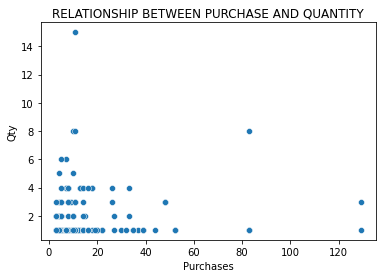

In [78]:
import seaborn as sns
Purchase = merged['Purchases']
Complaints = merged['Qty']
correlation = Purchase.corr(Complaints)
sns.scatterplot(x=Purchase,y=Complaints)
plt.title('RELATIONSHIP BETWEEN PURCHASE AND QUANTITY')
#the plot below shows that doctors with more complaints have purchased less amount of products approx 1-22
#from the company over the last year.

# partc

In [ ]:
#Define new doctor segments that help the company improve marketing efforts and customer 
#service.

<AxesSubplot:>

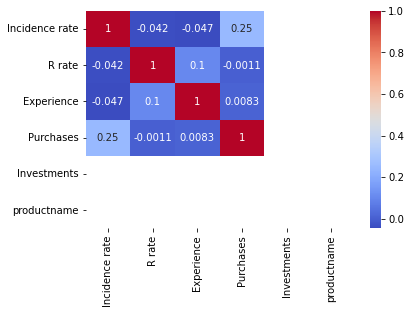

In [99]:
corr_mat = doctors.corr()
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
#heatmap defines how each variable is correlated with the other. 
#we can use this to see how much each variable has affect on other variables.

In [108]:
# "DoctorID" - is a unique identifier for each doctor.
# "Region" - the current geographical region of the doctor.
# "Category" - the type of doctor, either 'Specialist' or 'General Practitioner.'
# "Rank" - is an internal ranking system. It is an ordered variable: The highest level is Ambassadors, followed by Titanium Plus, Titanium, Platinum Plus, Platinum, Gold Plus, Gold, Silver Plus, and the lowest level is Silver.
# "Incidence rate" and "R rate" - relate to the amount of re-work each doctor generates.
# "Satisfaction" - measures doctors' satisfaction with the company.
# "Experience" - relates to the doctor's experience with the company.
# "Purchases" - purchases over the last year.
purchase_by_rank = doctors.groupby('Rank')['Purchases'].count()
data = pd.DataFrame(purchase_by_rank)
data.reset_index(drop=False,inplace=True)
data

,Rank,Purchases
0,Ambassador,115
1,Gold,22
2,Gold Plus,50
3,Platinum,77
4,Platinum Plus,54
5,Silver,3
6,Silver Plus,44
7,Titanium,69
8,Titanium Plus,1


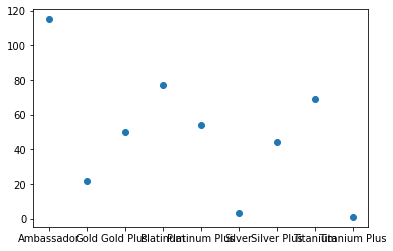

In [115]:
c1= data['Rank']
c2= data['Purchases']

plt.scatter(x=c1,y=c2)
plt.show()

#ambassadors and platinum customers are beneficial for the company

In [117]:
purchase_by_rank = doctors.groupby('Category')['Purchases'].count()
data2 = pd.DataFrame(purchase_by_rank)
data2.reset_index(drop=False,inplace=True)
data2

,Category,Purchases
0,General Practitioner,70
1,Specialist,367


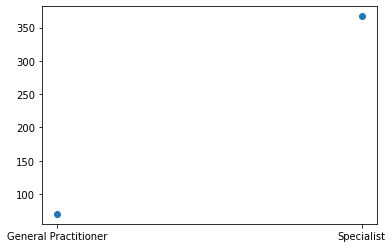

In [124]:
c1= data2['Category']
c2= data2['Purchases']
plt.scatter(x=c1,y=c2)
plt.show()
#specialist made prominent purchases.